In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.dropna(subset=['price'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
df

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm
...,...,...,...,...,...,...,...,...,...,...,...
3180,NaN,"$93,349",3 Ton 0 Kg,Nov 25 2016,D,advanced,M14904,"IN732490,IN732338,IN732503,IN732435,IN732583",2.02 meters,112 cm,29 cm
3181,NaN,"$40,384",2 Ton 830 Kg,May 25 2007,"J,B",intermediate,M14578,"IN732832,IN732166,IN733162,IN733785,IN732069,I...",2.15 meters,106 cm,28 cm
3182,NaN,"$1,074,844",3 Ton 80 Kg,Dec 16 2016,C,intermediate,"M14883,M15011","IN733462,IN732654,IN732149,IN733067,IN734088,I...",2.84 meters,96 cm,25 cm
3183,$44k,"$55,931",2 Ton 950 Kg,Apr 12 2002,R,advanced,M14341,IN732587,2.52 meters,100 cm,26 cm


In [4]:
features = list(df.columns)
target = 'price'
features.remove(target)

X = df[features]
y = df[target].str.strip("$").str.replace(",","").astype(float)

In [5]:
from sklearn.preprocessing import LabelEncoder
class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.pl_le = LabelEncoder() # create label-encoder
        self.pl_le.fit(X["product_level"]) # fit product level with label-encoder
        self.pt_le = LabelEncoder() # create label-encoder
        self.pt_le.fit_transform(X["product_type"]) # fit product type with label-encoder
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Cost"] = X["cost"].str.strip("$").str.strip("k").astype(float)*1000 # convert cost to numerical value
        new_df["Weight"] = X["weight"].map(self.weight2num) # convert weight to numerical value
        new_df["Month"] = pd.to_datetime(X["purchase_date"]).dt.month # convert purchase date to purchase month
        new_df["Weekday"] = pd.to_datetime(X["purchase_date"]).dt.weekday # convert purchase date to purchase weekday
        new_df['Ingredient Number'] = X["ingredient"].map(self.get_numbers) # obtain number of ingredients in recipe
        new_df["Product Level"] = self.pl_le.transform(X["product_level"]) # transform product level with label-encoder
        new_df["Product Type"] = self.pt_le.transform(X["product_type"]) # transform product type with label-encoder
        return new_df # return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def weight2num(self, x): # function to convert weight to number
        if type(x) == str:
            x = x.strip('Kg').split(' Ton ')
            return float(x[0])*1000+float(x[1])
        else:
            return x
        
    def get_numbers(self, x): # function to get number of ingredients in recipe
        if type(x) == str:
            return len(x.split(','))
        else:
            return x

In [6]:
dtf = Data_Transformer()
X_transformed = dtf.fit_transform(X)

In [7]:
X_transformed

,Cost,Weight,Month,Weekday,Ingredient Number,Product Level,Product Type
0,333000.0,3090.0,12,4,2.0,0,40
1,NaN,3030.0,9,2,5.0,1,23
2,270000.0,3040.0,9,2,3.0,1,23
3,NaN,3050.0,12,4,3.0,0,55
4,97000.0,2970.0,1,2,3.0,0,9
...,...,...,...,...,...,...,...
3180,NaN,3000.0,11,4,5.0,0,6
3181,NaN,2830.0,5,4,6.0,2,22
3182,NaN,3080.0,12,4,9.0,2,5
3183,44000.0,2950.0,4,4,1.0,0,44


In [8]:
df_transformed = pd.concat([X_transformed, y], axis=1)

In [9]:
df_transformed

,Cost,Weight,Month,Weekday,Ingredient Number,Product Level,Product Type,price
0,333000.0,3090.0,12,4,2.0,0,40,300492.0
1,NaN,3030.0,9,2,5.0,1,23,430570.0
2,270000.0,3040.0,9,2,3.0,1,23,213070.0
3,NaN,3050.0,12,4,3.0,0,55,229174.0
4,97000.0,2970.0,1,2,3.0,0,9,122659.0
...,...,...,...,...,...,...,...,...
3180,NaN,3000.0,11,4,5.0,0,6,93349.0
3181,NaN,2830.0,5,4,6.0,2,22,40384.0
3182,NaN,3080.0,12,4,9.0,2,5,1074844.0
3183,44000.0,2950.0,4,4,1.0,0,44,55931.0


In [10]:
def corr_matrix_heat_map(df, fig_width, fig_height):
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.index)):
        for j in range(i, len(corr_matrix.columns)):
            corr_matrix.loc[corr_matrix.index[i], corr_matrix.columns[j]] = np.nan
    plt.figure(figsize=(fig_width, fig_height))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr_matrix, cmap=cmap, vmin=-1, vmax=1, annot=True)

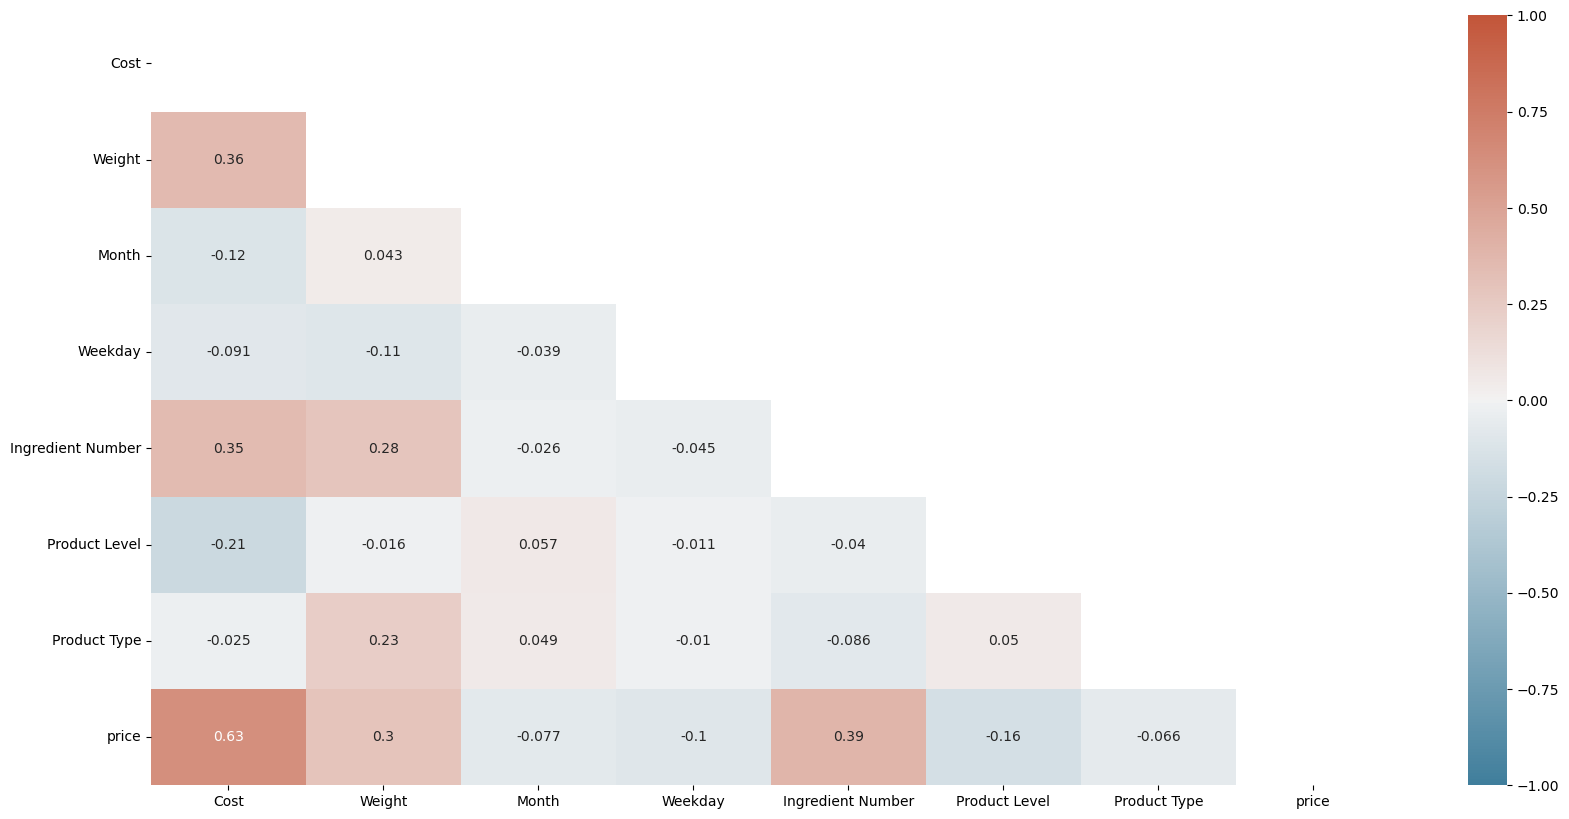

In [11]:
corr_matrix_heat_map(df_transformed, 20, 10)

Text(0, 0.5, 'Price')

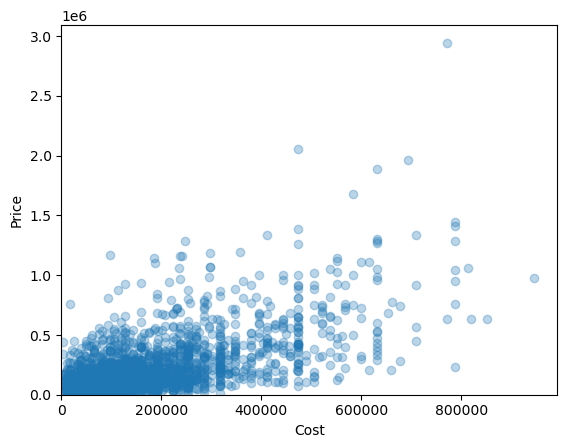

In [12]:
plt.scatter(df_transformed["Cost"], df_transformed["price"], alpha=0.3)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel("Cost")
plt.ylabel("Price")

In [13]:
def density_and_mean_median_in_bins(df, x_name, y_name, bin_left, bin_right, bin_width):
    bins = np.arange(bin_left, bin_right+1, bin_width)
    x_hist = np.histogram(df[~df[y_name].isnull()][x_name], bins=bins)[0]
    bin_number = len(bins)-1
    bin_names = []
    for i,num in enumerate(bins):
        if i >= 1:
            bin_name =  str(bins[i-1])+"-"+str(num)
            bin_names.append(bin_name)
    bin_indices = np.digitize(df[~df[y_name].isnull()][x_name], bins)
    bin_means = [df[~df[y_name].isnull()][y_name][bin_indices == i].mean() for i in range(1, bin_number+1)]
    bin_medians = [df[~df[y_name].isnull()][y_name][bin_indices == i].median() for i in range(1, bin_number+1)]
    plt.figure(figsize=(6,6))
    plt.subplot(2,1,1)
    plt.bar(np.arange(len(bin_names)), x_hist)
    plt.xlim(-0.5,len(bin_names)-0.5)
    plt.ylim(bottom=0)
    plt.xticks([])
    plt.ylabel('Count', fontsize=14)
    plt.subplot(2,1,2)
    plt.bar(np.arange(len(bin_names))-0.2, bin_means, width=0.4, label="mean")
    plt.bar(np.arange(len(bin_names))+0.2, bin_medians, width=0.4, label="median")
    plt.legend(fontsize=14,loc='best')
    plt.xlim(-0.5,len(bin_names)-0.5)
    plt.ylim(bottom=0)
    plt.xticks(np.arange(len(bin_names)), bin_names, rotation=90)
    plt.xlabel(x_name, fontsize=14)
    plt.ylabel(y_name, fontsize=14)

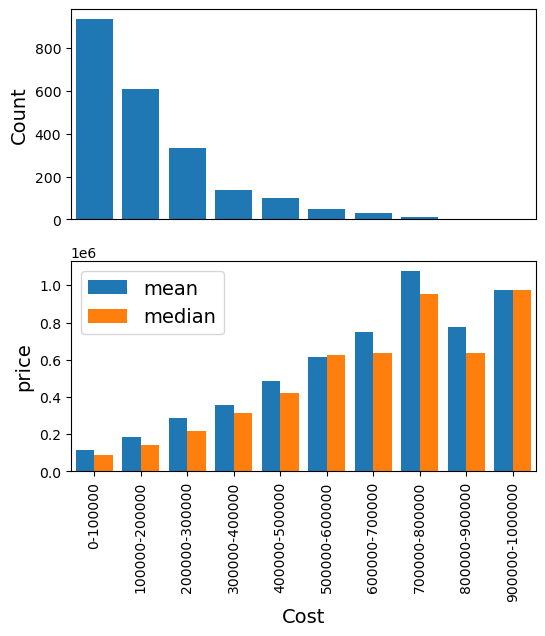

In [14]:
density_and_mean_median_in_bins(df_transformed, "Cost", "price", 0, 1000000, 100000)

In [15]:
def density_and_box_in_bins(df, x_name, y_name, bin_left, bin_right, bin_width):
    bins = np.arange(bin_left, bin_right+1, bin_width)
    x_hist = np.histogram(df[~df[y_name].isnull()][x_name], bins=bins)[0]
    bin_number = len(bins)-1
    bin_names = []
    for i,num in enumerate(bins):
        if i >= 1:
            bin_name =  str(bins[i-1])+"-"+str(num)
            bin_names.append(bin_name)
    bin_indices = np.digitize(df[~df[y_name].isnull()][x_name], bins)
    binned_data = [df[~df[y_name].isnull()][y_name][bin_indices == i] for i in range(1, bin_number+1)]
    plt.figure(figsize=(6,6))
    plt.subplot(2,1,1)
    plt.bar(np.arange(len(bin_names))+1, x_hist, width=0.8)
    plt.xlim(0.5,len(bin_names)+0.5)
    plt.ylim(bottom=0)
    plt.xticks([])
    plt.ylabel('Count', fontsize=14)
    plt.subplot(2,1,2)
    plt.boxplot(binned_data, showfliers=False)
    plt.xlim(0.5,len(bin_names)+0.5)
    plt.ylim(bottom=0)
    plt.xticks(np.arange(len(bin_names))+1, bin_names, rotation=90)
    plt.xlabel(x_name, fontsize=14)
    plt.ylabel(y_name, fontsize=14)

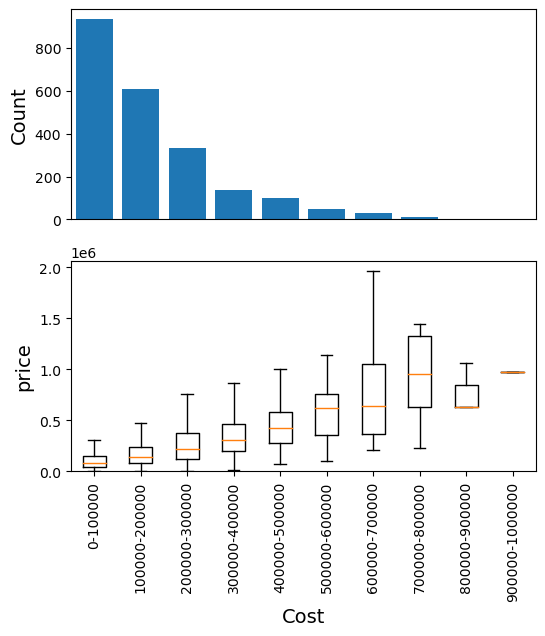

In [16]:
density_and_box_in_bins(df_transformed, "Cost", "price", 0, 1000000, 100000)

In [17]:
def density_and_violin_in_bins(df, x_name, y_name, bin_left, bin_right, bin_width):
    bins = np.arange(bin_left, bin_right+1, bin_width)
    x_hist = np.histogram(df[~df[y_name].isnull()][x_name], bins=bins)[0]
    bin_number = len(bins)-1
    bin_names = []
    for i,num in enumerate(bins):
        if i >= 1:
            bin_name =  str(bins[i-1])+"-"+str(num)
            bin_names.append(bin_name)
    bin_indices = np.digitize(df[~df[y_name].isnull()][x_name], bins)
    binned_data = [df[~df[y_name].isnull()][y_name][bin_indices == i] for i in range(1, bin_number+1)]
    plt.figure(figsize=(6,6))
    plt.subplot(2,1,1)
    plt.bar(np.arange(len(bin_names))+1, x_hist, width=0.8)
    plt.xlim(0.5,len(bin_names)+0.5)
    plt.ylim(bottom=0)
    plt.xticks([])
    plt.ylabel('Count', fontsize=14)
    plt.subplot(2,1,2)
    plt.violinplot(binned_data, showmedians=True)
    plt.xlim(0.5,len(bin_names)+0.5)
    plt.ylim(bottom=0)
    plt.xticks(np.arange(len(bin_names))+1, bin_names, rotation=90)
    plt.xlabel(x_name, fontsize=14)
    plt.ylabel(y_name, fontsize=14)

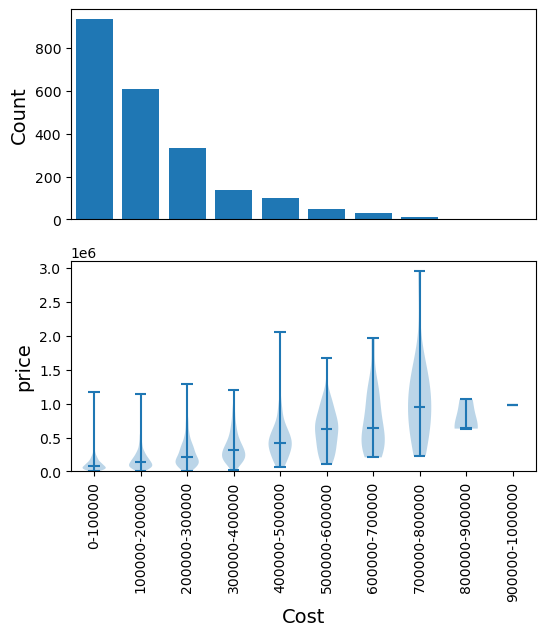

In [18]:
density_and_violin_in_bins(df_transformed, "Cost", "price", 0, 1000000, 100000)

In [19]:
def density_and_mean_median(df, x_name, y_name):
    x_hist = df[~df[y_name].isnull()][x_name].value_counts()
    x_hist = x_hist.sort_index()
    y_mean = df[~df[y_name].isnull()].groupby(x_name)[y_name].mean()
    y_median = df[~df[y_name].isnull()].groupby(x_name)[y_name].median()
    plt.figure(figsize=(6,6))
    plt.subplot(2,1,1)
    plt.bar(np.arange(len(x_hist)), x_hist, width=0.8)
    plt.xlim(-0.5,len(x_hist)-0.5)
    plt.ylim(bottom=0)
    plt.xticks([])
    plt.ylabel("Count", fontsize=14)
    plt.subplot(2,1,2)
    plt.bar(np.arange(len(x_hist))-0.2, y_mean, width=0.4, label="mean")
    plt.bar(np.arange(len(x_hist))+0.2, y_median, width=0.4, label="median")
    plt.xlim(-0.5,len(x_hist)-0.5)
    plt.ylim(bottom=0)
    plt.xticks(np.arange(len(x_hist)), x_hist.index, rotation=90)
    plt.legend(fontsize=14)
    plt.xlabel(x_name, fontsize=14)
    plt.ylabel(y_name, fontsize=14)

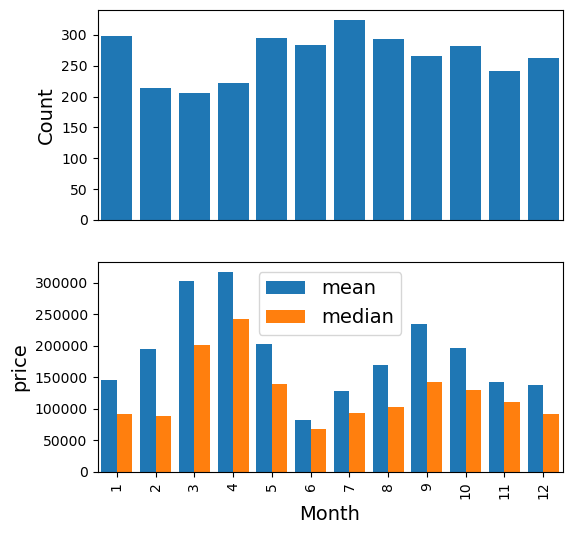

In [20]:
density_and_mean_median(df_transformed, "Month", "price")

In [21]:
def density_and_box(df, x_name, y_name):
    x_hist = df[~df[y_name].isnull()][x_name].value_counts()
    x_hist = x_hist.sort_index()
    y_groupby_x = list(df[~df[y_name].isnull()].groupby(x_name)[y_name])
    y_groupby_label = []
    y_groupby_data = []
    for label,data in y_groupby_x:
        y_groupby_label.append(label)
        y_groupby_data.append(data)
    plt.figure(figsize=(6,6))
    plt.subplot(2,1,1)
    plt.bar(np.arange(len(x_hist))+1, x_hist, width=0.8)
    plt.xlim(0.5,len(x_hist)+0.5)
    plt.ylim(bottom=0)
    plt.xticks([])
    plt.ylabel("Count", fontsize=14)
    plt.subplot(2,1,2)
    plt.boxplot(y_groupby_data, showfliers=False)
    plt.xlim(0.5,len(x_hist)+0.5)
    plt.ylim(bottom=0)
    plt.xticks(np.arange(len(x_hist))+1, x_hist.index, rotation=90)
    plt.xlabel(x_name, fontsize=14)
    plt.ylabel(y_name, fontsize=14)

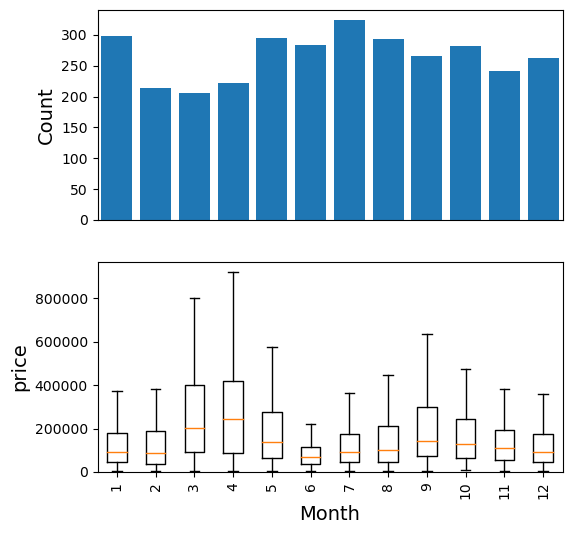

In [22]:
density_and_box(df_transformed, "Month", "price")

In [23]:
def density_and_violin(df, x_name, y_name):
    x_hist = df[~df[y_name].isnull()][x_name].value_counts()
    x_hist = x_hist.sort_index()
    y_groupby_x = list(df[~df[y_name].isnull()].groupby(x_name)[y_name])
    y_groupby_label = []
    y_groupby_data = []
    for label,data in y_groupby_x:
        y_groupby_label.append(label)
        y_groupby_data.append(data)
    plt.figure(figsize=(6,6))
    plt.subplot(2,1,1)
    plt.bar(np.arange(len(x_hist))+1, x_hist, width=0.8)
    plt.xlim(0.5,len(x_hist)+0.5)
    plt.ylim(bottom=0)
    plt.xticks([])
    plt.ylabel("Count", fontsize=14)
    plt.subplot(2,1,2)
    plt.violinplot(y_groupby_data, showmedians=True)
    plt.xlim(0.5,len(x_hist)+0.5)
    plt.ylim(bottom=0)
    plt.xticks(np.arange(len(x_hist))+1, x_hist.index, rotation=90)
    plt.xlabel(x_name, fontsize=14)
    plt.ylabel(y_name, fontsize=14)

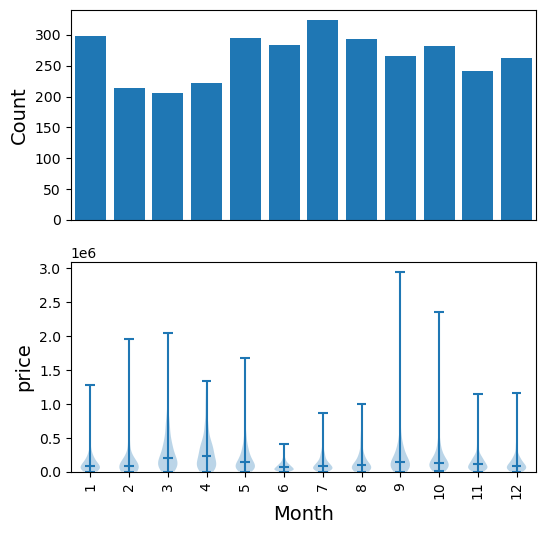

In [24]:
density_and_violin(df_transformed, "Month", "price")